## Практическое задание
Дьяченко Даниил @daniilstv

https://geekbrains.ru/lessons/60319/homework

# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [35]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

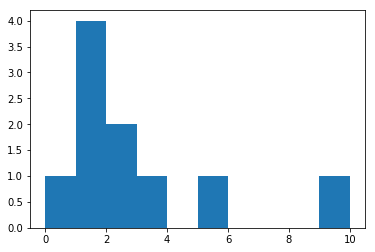

In [9]:
plt.hist(X[1]);

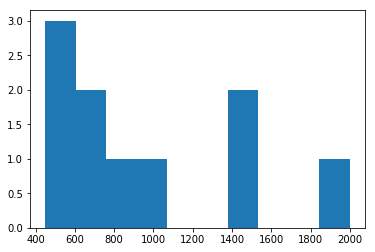

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

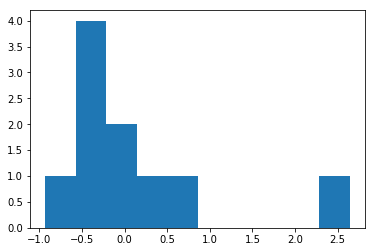

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

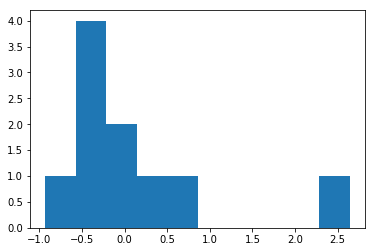

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 106.81085584435206, веса: [49.40853036  4.84395505  3.37022693  3.39791374]
# итерация: 200, MSE: 41.32049127723117, веса: [56.34017485  5.06766576  3.05894663  3.51885097]
# итерация: 300, MSE: 40.05849453248267, веса: [57.25944646  5.24524811  2.79066464  3.61320066]
# итерация: 400, MSE: 39.95950311762635, веса: [57.38135985  5.39262747  2.56645726  3.69300158]
# итерация: 500, MSE: 39.90422667283745, веса: [57.39752795  5.51503096  2.37911787  3.76042444]
# итерация: 600, MSE: 39.86593142745972, веса: [57.39967216  5.61674281  2.22259265  3.81731808]
# итерация: 700, MSE: 39.83923603239437, веса: [57.39995652  5.70129995  2.09181964  3.86527378]
# итерация: 800, MSE: 39.820623055958855, веса: [57.39999423  5.7716253   1.98256684  3.9056561 ]
# итерация: 900, MSE: 39.807644875617314, веса: [57.39999924  5.83013664  1.89129652  3.93963151]
# итерация: 1000, MSE: 39.79859535613416, веса: [57.3999999   5.8788356   1.81505161  3.96819441]


array([57.3999999 ,  5.8788356 ,  1.81505161,  3.96819441])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.22949351751549, веса: [57.39622633  5.36870057  2.28427617  4.03011441]
# итерация: 1000, MSE: 39.17179764320134, веса: [57.39811793  5.86568365  1.77656901  4.04463976]
# итерация: 1500, MSE: 38.66881208458076, веса: [57.39791532  6.03965586  1.56640969  4.08267165]
# итерация: 2000, MSE: 38.444243222870526, веса: [57.39783868  6.10351249  1.48012826  4.1059159 ]
# итерация: 2500, MSE: 38.34778863979854, веса: [57.39780895  6.12778459  1.44487518  4.11724662]
# итерация: 3000, MSE: 38.30731009305349, веса: [57.39779723  6.13723451  1.43051224  4.12230574]
# итерация: 3500, MSE: 38.290553450614084, веса: [57.39779255  6.14097181  1.42467029  4.12447068]
# итерация: 4000, MSE: 38.28367278016565, веса: [57.39779067  6.14246459  1.42229654  4.12537636]
# итерация: 4500, MSE: 38.28086101040971, веса: [57.39778991  6.14306453  1.4213326   4.12575045]
# итерация: 5000, MSE: 38.27971529369078, веса: [57.39778961  6.14330654  1.4209413   4.12590385]


array([57.39778961,  6.14330654,  1.4209413 ,  4.12590385])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [201]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, vebrose=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if vebrose:
            if i % (iterations / 10) == 0:
                print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [202]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4, vebrose=True)

# итерация: 500, MSE: 39.981664122534156, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406397, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280034, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.7785235657889, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.777887486171274, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.777755943216036, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451418, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [ ]:
import pandas as pd

In [195]:
def eval_model_reg2_(X, y, iterations, alpha=1e-4, lambda_=1e-8):

    box = pd.DataFrame(columns=['MSE', 'X1', 'X2', 'X3', 'X4'])
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 

        
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
#             print(err)
            box.loc[i] = [err , W[0] , W[1] , W[2] , W[3]]
#             box.append({'MSE': err}, ignore_index=True) #, {'W' : W} )
            #box.append(W)

    return box

In [239]:
lambda_ = (1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10)

In [240]:
box = pd.DataFrame(columns=['lambda_', 'X1', 'X2', 'X3', 'X4'])

for i in lambda_ :
#     print(i)
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i, vebrose=False)
    box.loc[i] = [i , W[0] , W[1] , W[2] , W[3]]
box.describe()

,lambda_,X1,X2,X3,X4
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000
mean,1.010101e+00,51.034778,5.386724,1.647540,3.763158
std,2.996444e+00,14.886199,1.510471,0.497507,0.834956
min,1.000000e-09,9.566667,1.425305,1.352265,1.370379
25%,5.500000e-07,55.890547,5.660367,1.428793,3.981270
50%,1.000000e-04,57.397130,6.121025,1.428925,4.115875
75%,5.500000e-02,57.399984,6.122206,1.498154,4.116241
max,1.000000e+01,57.400000,6.122213,2.943526,4.116243


In [241]:
box

,lambda_,X1,X2,X3,X4
1.000000e-09,1.000000e-09,57.400000,6.122213,1.428792,4.116243
1.000000e-08,1.000000e-08,57.400000,6.122213,1.428792,4.116243
1.000000e-07,1.000000e-07,57.399997,6.122212,1.428793,4.116243
1.000000e-06,1.000000e-06,57.399971,6.122201,1.428805,4.116239
1.000000e-05,1.000000e-05,57.399713,6.122094,1.428925,4.116206
1.000000e-04,1.000000e-04,57.397130,6.121025,1.430120,4.115875
1.000000e-03,1.000000e-03,57.371314,6.110388,1.442004,4.112578
1.000000e-02,1.000000e-02,57.114428,6.008844,1.554304,4.081448
1.000000e-01,1.000000e-01,54.666667,5.311890,2.256608,3.881092
1.000000e+00,1.000000e+00,38.266667,3.665575,2.943526,3.252190


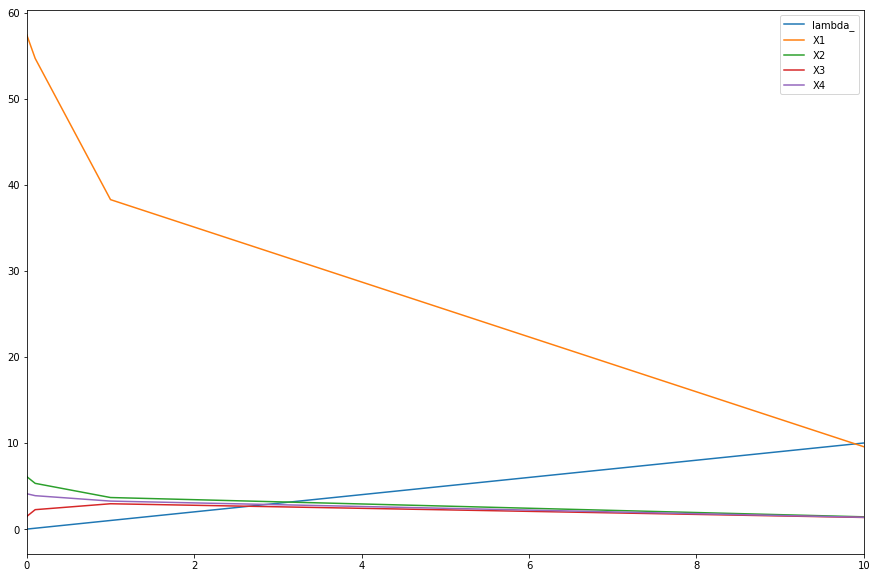

In [242]:
box.plot(figsize=(15, 10))

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
Нормализация - это изменение масштаба данных из исходного диапазона, чтобы все значения находились в диапазоне от 0 до 1.
Стандартизация набора данных включает в себя изменение масштаба распределения значений так, чтобы среднее значение наблюдаемых значений было 0, а стандартное отклонение - 1.

Применять нормализацию и стандартизацию не имеет смысла. Сработает последняя функция.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [249]:

def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)

       # W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) # L2
       # W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * (W**2)) # L1 - мой вариант
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) # L1 - верный вариант
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [250]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.981549269279725, веса: [57.3976156   5.1079242   2.46011903  4.08691798]
# итерация: 1000, MSE: 39.80712300604176, веса: [57.3999499   5.76651203  1.85620907  4.03912572]
# итерация: 1500, MSE: 39.78234087113101, веса: [57.39995     5.99151699  1.60431305  4.06910179]
# итерация: 2000, MSE: 39.77848915615644, веса: [57.39995     6.07256443  1.50039558  4.09329499]
# итерация: 2500, MSE: 39.77786776237368, веса: [57.39995     6.10296578  1.45779797  4.10604572]
# итерация: 3000, MSE: 39.7777660764615, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.77774934650399, веса: [57.39995    6.1193181  1.4333132  4.1145017]
# итерация: 4000, MSE: 39.77774658745511, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.777746131578084, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.77774605600939, веса: [57.39995     6.12219276  1.42877888  4.11622191]


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])